# Depression Prediction Project
## Kaggle Competition Solution

*By: Sanny Un Sowadh Wamik*

In this notebook, I'll walk through my complete solution to a depression prediction challenge. This project aims to predict depression based on demographic, lifestyle, and health-related features.

## 1. Project Overview

### Objective
My goal was to build a model that accurately predicts depression diagnoses using various personal and lifestyle factors. The challenge presents an opportunity to develop insights that could potentially help with early detection and intervention strategies.

### Dataset
The dataset consists of:
- Training data with 140,700 records and 20 features including the target variable
- Test data with 93,800 records (without the target variable)
- Submission template file

The features include demographic information (age, gender, city), lifestyle factors (sleep patterns, dietary habits), academic and work-related variables (pressure, satisfaction, hours), and important mental health indicators (family history, suicidal thoughts).

## 2. Setup and Data Loading

In [1]:
# Install required libraries
%pip install pandas numpy matplotlib seaborn scikit-learn lightgbm

# Essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report, confusion_matrix
import lightgbm as lgb
import warnings
warnings.filterwarnings('ignore')

# Set visualization styles
plt.style.use('fivethirtyeight')
sns.set_palette('Set2')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

print("Libraries loaded successfully!")

  Using cached pandas-2.2.3-cp312-cp312-macosx_11_0_arm64.whl.metadata (89 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached scikit_learn-1.6.1-cp312-cp312-macosx_12_0_arm64.whl.metadata (31 kB)
  Using cached lightgbm-4.6.0-py3-none-macosx_12_0_arm64.whl.metadata (17 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
Using cached pandas-2.2.3-cp312-cp312-macosx_11_0_arm64.whl (11.4 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 6.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 6.6 MB/s eta 0:00:00a 0:00:01
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Usin

In [2]:
# Load the dataset
print("Loading data...")
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission.csv')

print(f"Train data shape: {train_data.shape}")
print(f"Test data shape: {test_data.shape}")
print(f"Submission format: {submission.shape}")

# Preview the training data
train_data.head()

Loading data...
Train data shape: (140700, 20)
Test data shape: (93800, 19)
Submission format: (93800, 2)


,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


## 3. Exploratory Data Analysis

My first step was to understand the data through extensive exploratory analysis. This helps identify patterns, relationships, and potential issues in the dataset.

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 20 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Name                                   140700 non-null  object 
 2   Gender                                 140700 non-null  object 
 3   Age                                    140700 non-null  float64
 4   City                                   140700 non-null  object 
 5   Working Professional or Student        140700 non-null  object 
 6   Profession                             104070 non-null  object 
 7   Academic Pressure                      27897 non-null   float64
 8   Work Pressure                          112782 non-null  float64
 9   CGPA                                   27898 non-null   float64
 10  Study Satisfaction                 

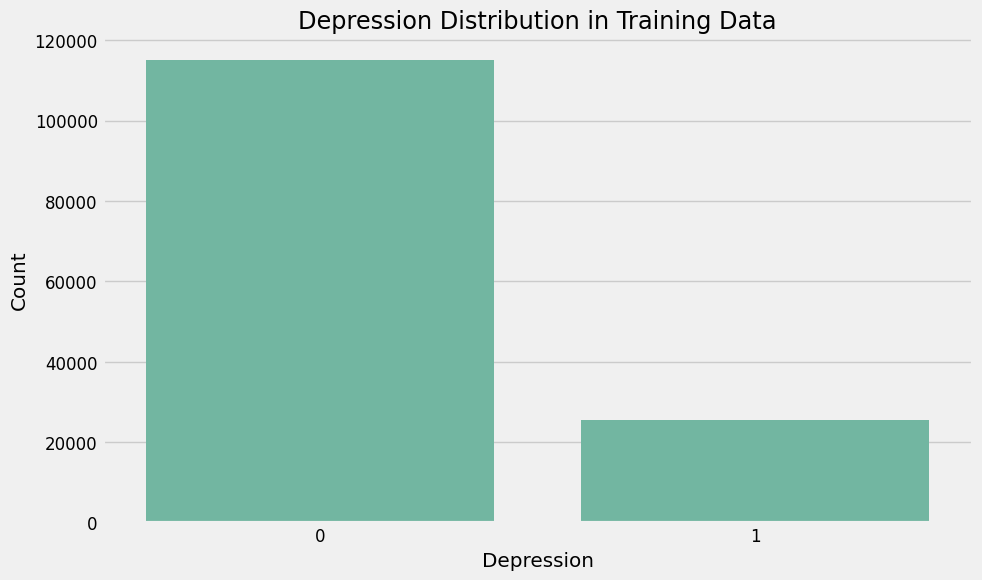

In [3]:
# Dataset info
print("Dataset Information:")
train_data.info()

# Check for missing values
print("\nMissing values in training data:")
missing_values = train_data.isnull().sum()
print(missing_values[missing_values > 0])

# Check target variable distribution
print("\nTarget variable distribution:")
depression_counts = train_data['Depression'].value_counts(normalize=True) * 100
print(f"Depression (1): {depression_counts[1]:.2f}%")
print(f"No Depression (0): {depression_counts[0]:.2f}%")

plt.figure(figsize=(10, 6))
sns.countplot(x='Depression', data=train_data)
plt.title('Depression Distribution in Training Data')
plt.ylabel('Count')
plt.show()

### Key Feature Visualizations

I'll explore some of the most important features and their relationships with depression.

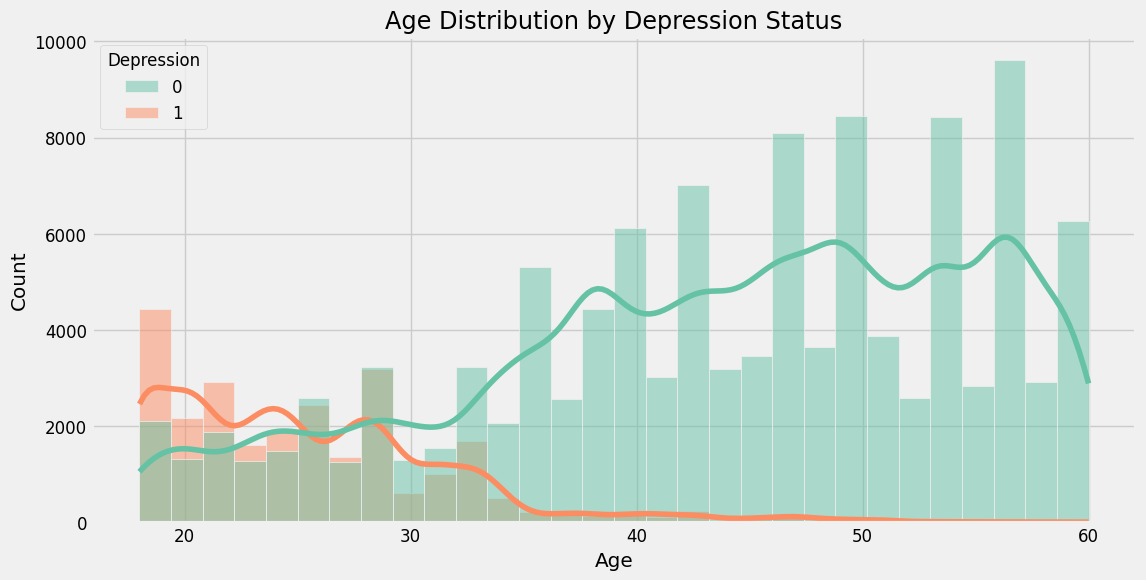

<Figure size 1200x600 with 0 Axes>

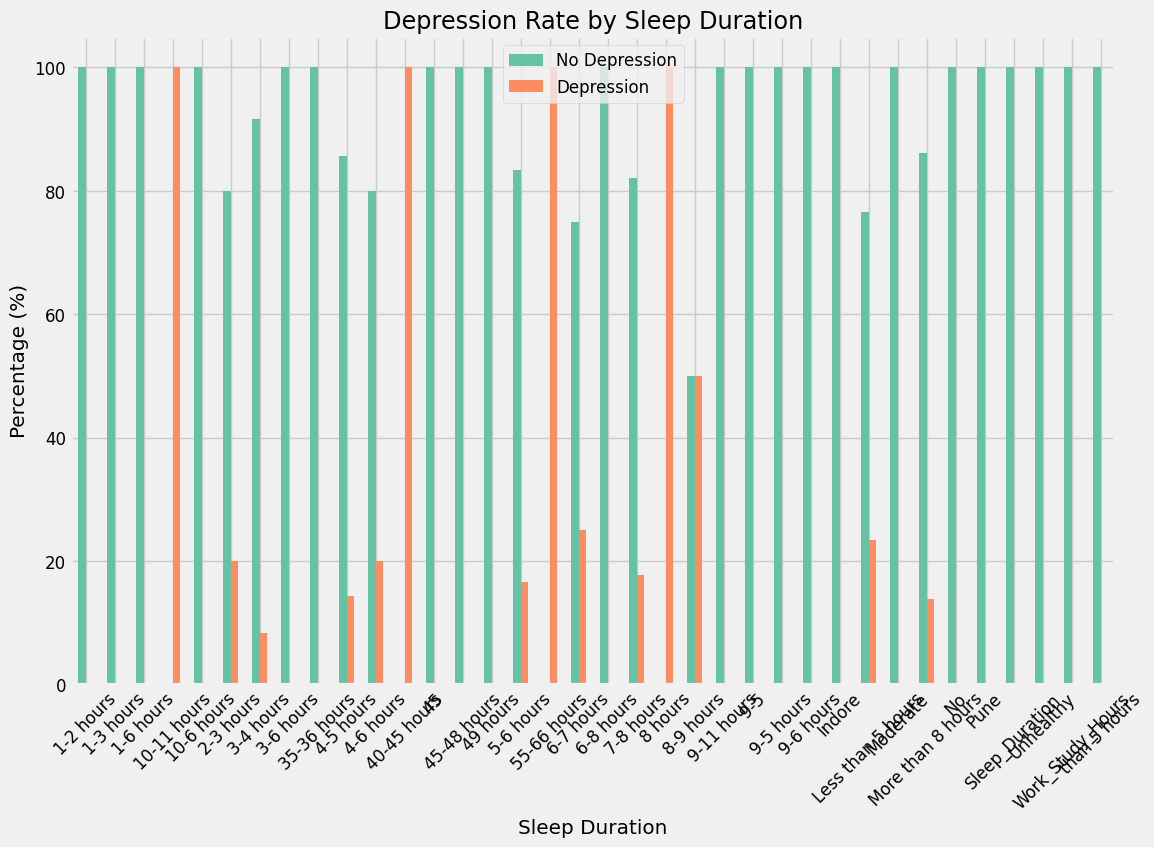

<Figure size 1200x600 with 0 Axes>

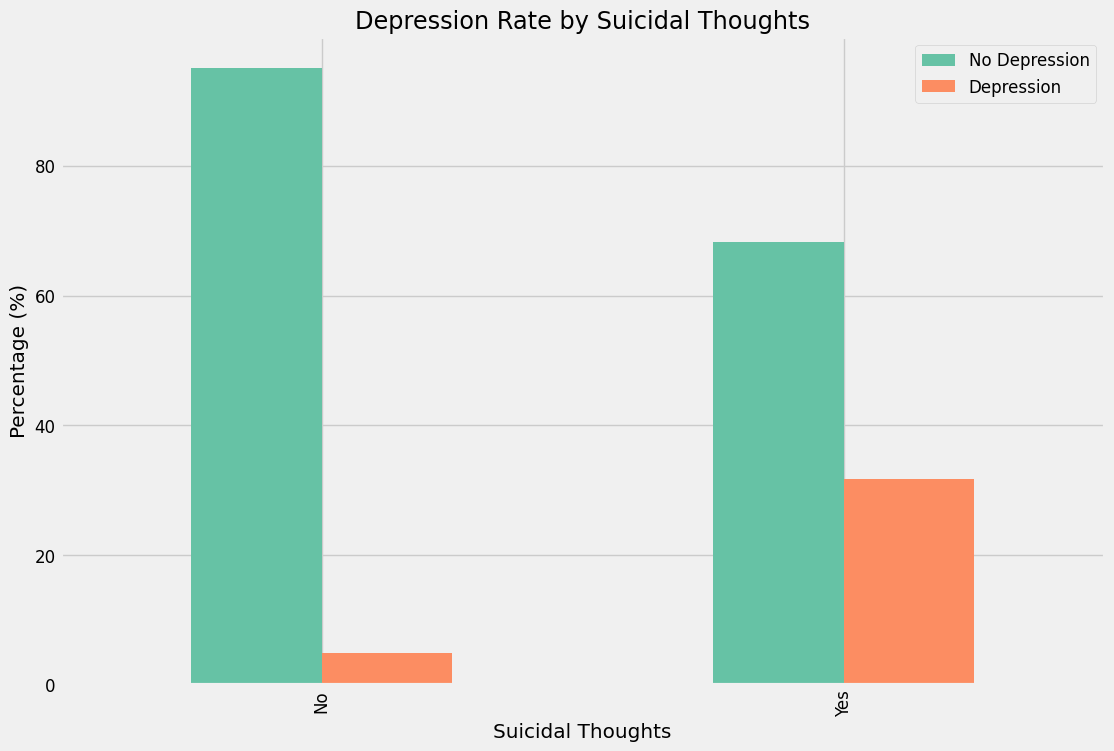

In [4]:
# Age distribution by depression status
plt.figure(figsize=(12, 6))
sns.histplot(data=train_data, x='Age', hue='Depression', bins=30, kde=True)
plt.title('Age Distribution by Depression Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Sleep Duration vs Depression
plt.figure(figsize=(12, 6))
sleep_depression = pd.crosstab(train_data['Sleep Duration'], train_data['Depression'], normalize='index') * 100
sleep_depression.plot(kind='bar')
plt.title('Depression Rate by Sleep Duration')
plt.xlabel('Sleep Duration')
plt.ylabel('Percentage (%)')
plt.legend(['No Depression', 'Depression'])
plt.xticks(rotation=45)
plt.show()

# Suicidal thoughts vs Depression
plt.figure(figsize=(12, 6))
suicidal_depression = pd.crosstab(train_data['Have you ever had suicidal thoughts ?'], 
                                 train_data['Depression'], 
                                 normalize='index') * 100
suicidal_depression.plot(kind='bar')
plt.title('Depression Rate by Suicidal Thoughts')
plt.xlabel('Suicidal Thoughts')
plt.ylabel('Percentage (%)')
plt.legend(['No Depression', 'Depression'])
plt.show()

<Figure size 1200x600 with 0 Axes>

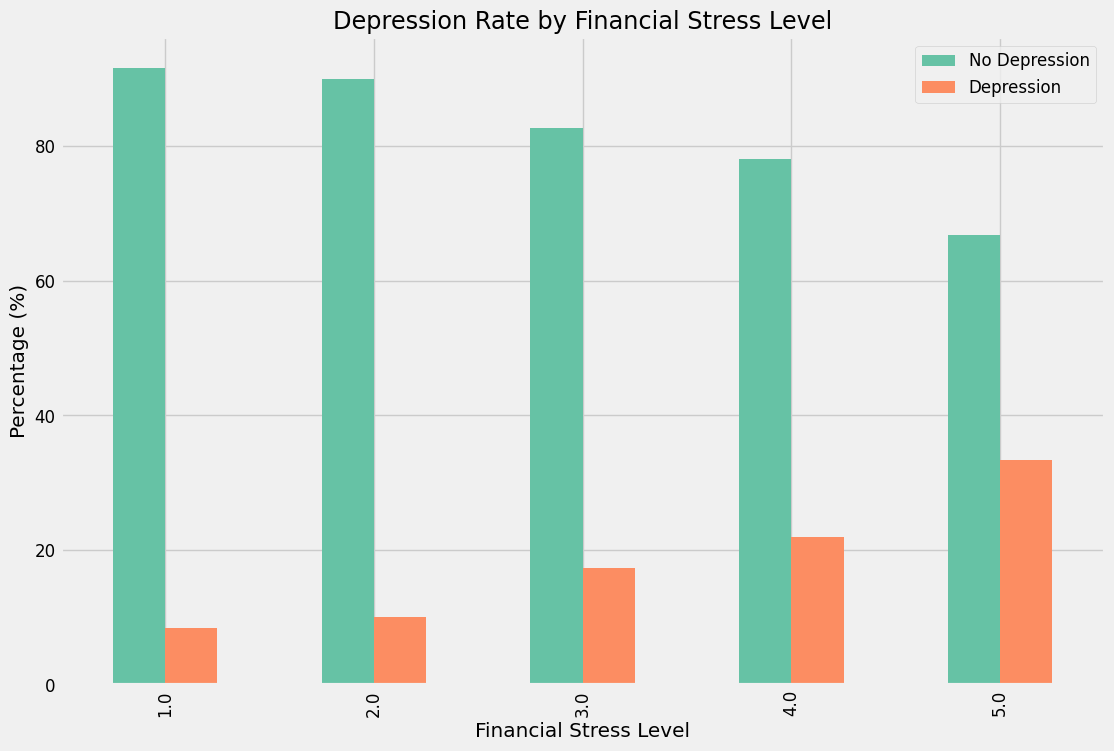

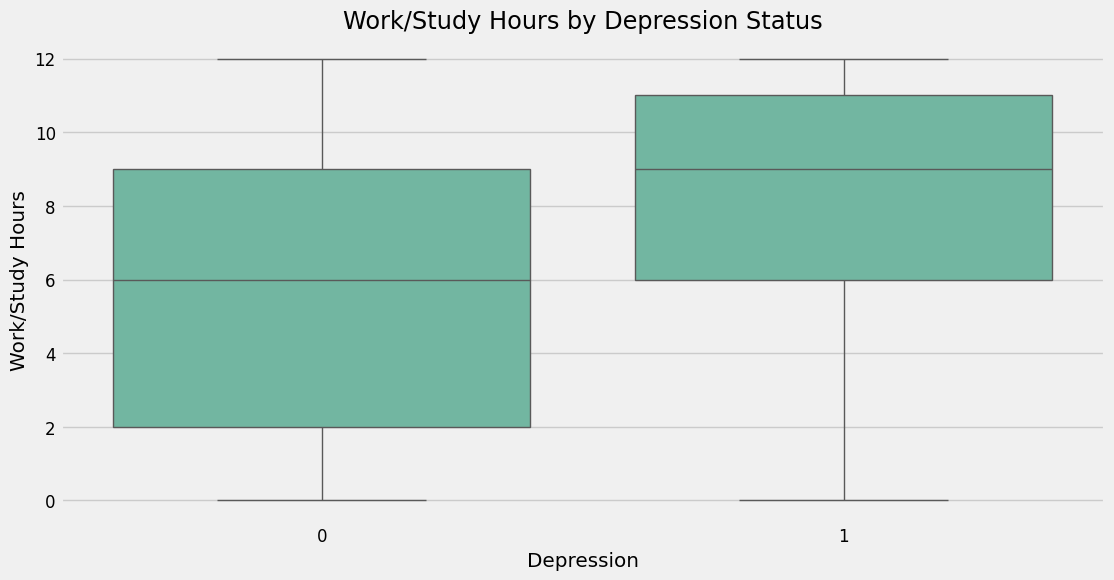

In [5]:
# Financial Stress vs Depression
plt.figure(figsize=(12, 6))
financial_depression = pd.crosstab(train_data['Financial Stress'], 
                                  train_data['Depression'], 
                                  normalize='index') * 100
financial_depression.plot(kind='bar')
plt.title('Depression Rate by Financial Stress Level')
plt.xlabel('Financial Stress Level')
plt.ylabel('Percentage (%)')
plt.legend(['No Depression', 'Depression'])
plt.show()

# Work/Study Hours vs Depression
plt.figure(figsize=(12, 6))
sns.boxplot(x='Depression', y='Work/Study Hours', data=train_data)
plt.title('Work/Study Hours by Depression Status')
plt.xlabel('Depression')
plt.ylabel('Work/Study Hours')
plt.show()

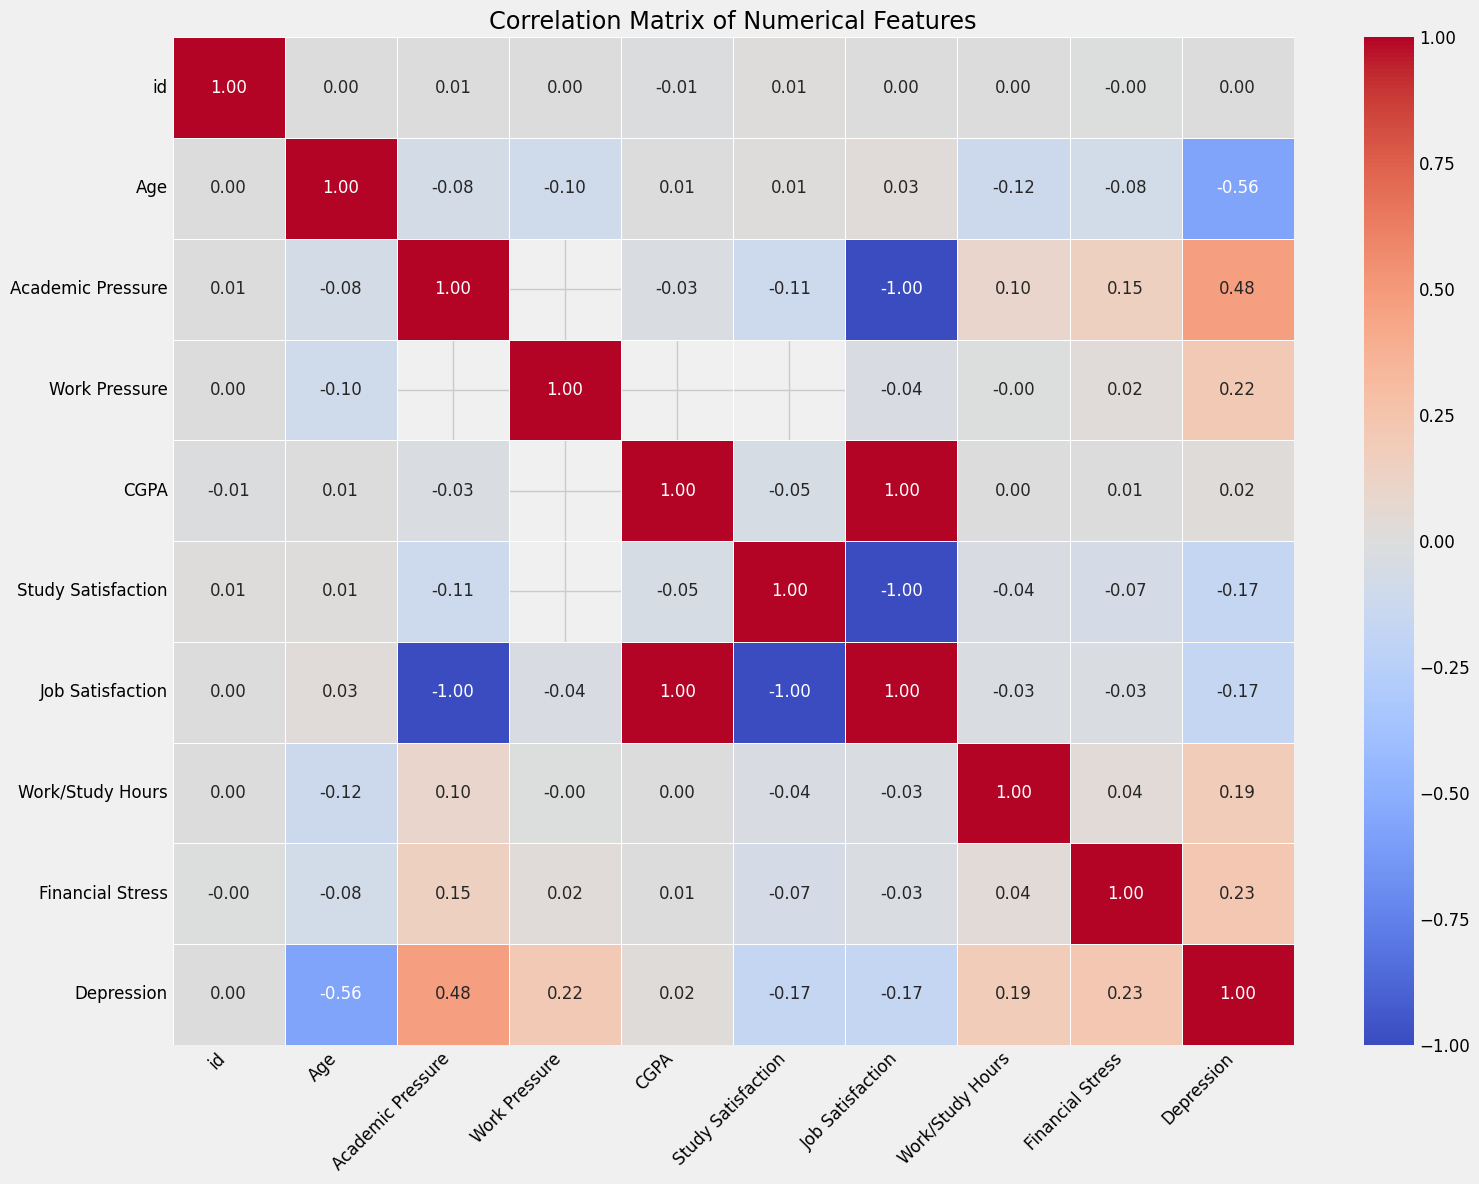

In [6]:
# Correlation matrix of numerical features
numeric_columns = train_data.select_dtypes(include=['int64', 'float64']).columns
correlation = train_data[numeric_columns].corr()

plt.figure(figsize=(16, 12))
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 4. Data Preprocessing

Based on my exploratory analysis and the competition feedback, I identified several data quality issues that needed to be addressed:

1. Inconsistent categorical values
2. Misplaced values in wrong columns
3. Unreasonable numeric values

I implemented a comprehensive data cleaning strategy to handle these issues.

In [7]:
def clean_data(df):
    df_clean = df.copy()
    
    # Fix inconsistencies in City column
    # Based on my analysis, values like "Less than 5 hours" in City column are incorrect
    valid_cities = [
        'Mumbai', 'Delhi', 'Bangalore', 'Hyderabad', 'Chennai', 'Kolkata', 
        'Pune', 'Ahmedabad', 'Jaipur', 'Lucknow', 'Kanpur', 'Nagpur', 
        'Indore', 'Thane', 'Bhopal', 'Visakhapatnam', 'Patna', 'Vadodara', 
        'Ghaziabad', 'Ludhiana', 'Agra', 'Nashik', 'Faridabad', 'Meerut', 
        'Rajkot', 'Varanasi', 'Srinagar', 'Aurangabad', 'Dhanbad', 'Amritsar', 
        'Navi Mumbai', 'Allahabad', 'Ranchi', 'Howrah', 'Coimbatore', 'Jabalpur', 
        'Gwalior', 'Vijayawada', 'Jodhpur', 'Madurai', 'Raipur', 'Kota', 'Guwahati', 
        'Chandigarh', 'Solapur', 'Hubli', 'Dharwad', 'Bareilly', 'Moradabad', 
        'Mysore', 'Gurgaon', 'Aligarh', 'Jalandhar', 'Tiruchirappalli', 'Bhubaneswar', 
        'Salem', 'Mira-Bhayandar', 'Warangal', 'Jalgaon', 'Guntur', 'Bhiwandi', 
        'Saharanpur', 'Gorakhpur', 'Bikaner', 'Amravati', 'Noida', 'Jamshedpur', 
        'Bhilai', 'Cuttack', 'Firozabad', 'Kochi', 'Nellore', 'Bhavnagar', 'Dehradun', 
        'Durgapur', 'Asansol', 'Rourkela', 'Nanded', 'Kolhapur', 'Ajmer', 'Akola', 
        'Gulbarga', 'Jamnagar', 'Ujjain', 'Loni', 'Siliguri', 'Jhansi', 'Ulhasnagar', 
        'Jammu', 'Sangli-Miraj', 'Kupwad', 'Mangalore', 'Erode', 'Belgaum', 'Ambattur', 
        'Tirunelveli', 'Malegaon', 'Gaya', 'Jalgaon', 'Udaipur', 'Maheshtala', 'Kalyan', 
        'Vasai-Virar', 'Surat'
    ]
    
    # Set invalid cities to NaN
    df_clean.loc[~df_clean['City'].isin(valid_cities), 'City'] = np.nan
    
    # Define valid values for categorical columns
    valid_gender = ['Male', 'Female', 'Other']
    valid_work_status = ['Working Professional', 'Student']
    valid_sleep = ['Less than 5 hours', '5-6 hours', '7-8 hours', 'More than 8 hours']
    valid_diet = ['Healthy', 'Moderate', 'Unhealthy']
    valid_family_history = ['Yes', 'No']
    valid_suicidal_thoughts = ['Yes', 'No']
    
    # Clean categorical columns
    df_clean.loc[~df_clean['Gender'].isin(valid_gender), 'Gender'] = np.nan
    df_clean.loc[~df_clean['Working Professional or Student'].isin(valid_work_status), 'Working Professional or Student'] = np.nan
    df_clean.loc[~df_clean['Sleep Duration'].isin(valid_sleep), 'Sleep Duration'] = np.nan
    df_clean.loc[~df_clean['Dietary Habits'].isin(valid_diet), 'Dietary Habits'] = np.nan
    df_clean.loc[~df_clean['Family History of Mental Illness'].isin(valid_family_history), 'Family History of Mental Illness'] = np.nan
    df_clean.loc[~df_clean['Have you ever had suicidal thoughts ?'].isin(valid_suicidal_thoughts), 'Have you ever had suicidal thoughts ?'] = np.nan
    
    # Validate numeric columns
    # Age should be reasonable
    df_clean.loc[df_clean['Age'] < 10, 'Age'] = np.nan 
    df_clean.loc[df_clean['Age'] > 100, 'Age'] = np.nan
    
    # Pressure, satisfaction, and stress metrics are typically 1-5 scales
    for col in ['Academic Pressure', 'Work Pressure', 'Study Satisfaction', 
                'Job Satisfaction', 'Financial Stress']:
        df_clean.loc[(df_clean[col] < 0) | (df_clean[col] > 5), col] = np.nan
    
    # CGPA is typically 0-10
    df_clean.loc[(df_clean['CGPA'] < 0) | (df_clean['CGPA'] > 10), 'CGPA'] = np.nan
    
    # Work/Study hours should be reasonable
    df_clean.loc[(df_clean['Work/Study Hours'] < 0) | (df_clean['Work/Study Hours'] > 16), 'Work/Study Hours'] = np.nan
    
    return df_clean

# Apply cleaning to both datasets
print("Cleaning data...")
train_clean = clean_data(train_data)
test_clean = clean_data(test_data)

# Show impact of cleaning
print("\nMissing values after cleaning:")
missing_after = train_clean.isnull().sum()
print(missing_after[missing_after > 0])

Cleaning data...

Missing values after cleaning:
City                      97
Profession             36630
Academic Pressure     112803
Work Pressure          27918
CGPA                  112802
Study Satisfaction    112803
Job Satisfaction       27910
Sleep Duration            79
Dietary Habits            27
Degree                     2
Financial Stress           4
dtype: int64


## 5. Feature Engineering

Next, I created derived features based on domain knowledge and insights from my EDA. These engineered features help capture patterns that might be predictive of depression.

In [8]:
def engineer_features(df):
    df_eng = df.copy()
    
    # Create dummy features for Sleep Duration
    df_eng['Sleep_LessThan5'] = (df_eng['Sleep Duration'] == 'Less than 5 hours').astype(int)
    df_eng['Sleep_5to6'] = (df_eng['Sleep Duration'] == '5-6 hours').astype(int)
    df_eng['Sleep_7to8'] = (df_eng['Sleep Duration'] == '7-8 hours').astype(int)
    df_eng['Sleep_MoreThan8'] = (df_eng['Sleep Duration'] == 'More than 8 hours').astype(int)
    
    # Create features from categorical columns
    df_eng['IsStudent'] = (df_eng['Working Professional or Student'] == 'Student').astype(int)
    df_eng['HasSuicidalThoughts'] = (df_eng['Have you ever had suicidal thoughts ?'] == 'Yes').astype(int)
    df_eng['HasFamilyHistory'] = (df_eng['Family History of Mental Illness'] == 'Yes').astype(int)
    
    # Diet habits
    df_eng['Diet_Healthy'] = (df_eng['Dietary Habits'] == 'Healthy').astype(int)
    df_eng['Diet_Moderate'] = (df_eng['Dietary Habits'] == 'Moderate').astype(int)
    df_eng['Diet_Unhealthy'] = (df_eng['Dietary Habits'] == 'Unhealthy').astype(int)
    
    # Gender
    df_eng['IsMale'] = (df_eng['Gender'] == 'Male').astype(int)
    df_eng['IsFemale'] = (df_eng['Gender'] == 'Female').astype(int)
    
    # Create interaction features
    df_eng['Sleep_Work_Interaction'] = df_eng['Sleep_LessThan5'] * df_eng['Work/Study Hours']
    df_eng['Pressure_Financial_Interaction'] = df_eng['Academic Pressure'] * df_eng['Financial Stress']
    
    # Age groups
    df_eng['Age_Teen'] = ((df_eng['Age'] >= 13) & (df_eng['Age'] <= 19)).astype(int)
    df_eng['Age_YoungAdult'] = ((df_eng['Age'] >= 20) & (df_eng['Age'] <= 35)).astype(int)
    df_eng['Age_MiddleAge'] = ((df_eng['Age'] >= 36) & (df_eng['Age'] <= 55)).astype(int)
    df_eng['Age_Senior'] = (df_eng['Age'] > 55).astype(int)
    
    # Student with high academic pressure
    df_eng['HighPressureStudent'] = ((df_eng['IsStudent'] == 1) & 
                                    (df_eng['Academic Pressure'] >= 4)).astype(int)
    
    # Professional with high work pressure
    df_eng['HighPressureProfessional'] = ((df_eng['IsStudent'] == 0) & 
                                         (df_eng['Work Pressure'] >= 4)).astype(int)
    
    # High risk combination: suicidal thoughts + poor sleep + family history
    df_eng['HighRiskCombo'] = ((df_eng['HasSuicidalThoughts'] == 1) & 
                              (df_eng['Sleep_LessThan5'] == 1) & 
                              (df_eng['HasFamilyHistory'] == 1)).astype(int)
    
    return df_eng

# Apply feature engineering
print("Engineering features...")
train_eng = engineer_features(train_clean)
test_eng = engineer_features(test_clean)

# Display the new features
print("\nNew features created:")
new_features = [col for col in train_eng.columns if col not in train_data.columns]
print(new_features)

# Preview engineered dataset
train_eng[new_features + ['Depression']].head()

Engineering features...

New features created:
['Sleep_LessThan5', 'Sleep_5to6', 'Sleep_7to8', 'Sleep_MoreThan8', 'IsStudent', 'HasSuicidalThoughts', 'HasFamilyHistory', 'Diet_Healthy', 'Diet_Moderate', 'Diet_Unhealthy', 'IsMale', 'IsFemale', 'Sleep_Work_Interaction', 'Pressure_Financial_Interaction', 'Age_Teen', 'Age_YoungAdult', 'Age_MiddleAge', 'Age_Senior', 'HighPressureStudent', 'HighPressureProfessional', 'HighRiskCombo']


,Sleep_LessThan5,Sleep_5to6,Sleep_7to8,Sleep_MoreThan8,IsStudent,HasSuicidalThoughts,HasFamilyHistory,Diet_Healthy,Diet_Moderate,Diet_Unhealthy,...,Sleep_Work_Interaction,Pressure_Financial_Interaction,Age_Teen,Age_YoungAdult,Age_MiddleAge,Age_Senior,HighPressureStudent,HighPressureProfessional,HighRiskCombo,Depression
0,0,0,0,1,0,0,0,1,0,0,...,0.0,NaN,0,0,1,0,0,1,0,0
1,1,0,0,0,0,1,0,0,0,1,...,7.0,NaN,0,1,0,0,0,1,0,1
2,0,1,0,0,1,1,0,1,0,0,...,0.0,5.0,0,1,0,0,1,0,0,1
3,1,0,0,0,0,1,1,0,1,0,...,10.0,NaN,0,1,0,0,0,1,1,1
4,0,1,0,0,0,1,1,0,0,1,...,0.0,NaN,0,1,0,0,0,0,0,0


## 6. Model Development

After preprocessing and feature engineering, I moved on to building predictive models. I explored multiple approaches:

1. Traditional ML models (ensemble methods)
2. AutoML frameworks
3. A blended approach combining multiple models

Let's start with my traditional ML approach:

In [9]:
# Prepare data for modeling
drop_columns = ['id', 'Name', 'Gender', 'City', 'Working Professional or Student', 
                'Profession', 'Sleep Duration', 'Dietary Habits', 'Degree', 
                'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness']

X_train = train_eng.drop(drop_columns + ['Depression'], axis=1)
y_train = train_eng['Depression']
X_test = test_eng.drop(drop_columns, axis=1)

print(f"Training features shape: {X_train.shape}")
print(f"Test features shape: {X_test.shape}")

# Define preprocessing pipeline
# Identify numerical and categorical columns
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

# Define preprocessing for numerical columns
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Define preprocessing for categorical columns
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols if len(categorical_cols) > 0 else [])
    ])

# Create a preprocessing and validation function
def evaluate_model(name, model, X, y, cv=5):
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    
    # Cross-validation
    cv_scores = cross_val_score(pipeline, X, y, cv=cv, scoring='roc_auc')
    print(f"{name} - Cross-validation ROC-AUC: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")
    
    # Train on full dataset
    pipeline.fit(X, y)
    return pipeline

Training features shape: (140700, 29)
Test features shape: (93800, 29)


In [10]:
# Train different models
print("Training models...")

# Gradient Boosting
gb_model = GradientBoostingClassifier(
    n_estimators=200, 
    learning_rate=0.1, 
    max_depth=5, 
    random_state=42
)
gb_pipeline = evaluate_model("Gradient Boosting", gb_model, X_train, y_train)

# Random Forest
rf_model = RandomForestClassifier(
    n_estimators=200, 
    max_depth=10, 
    random_state=42
)
rf_pipeline = evaluate_model("Random Forest", rf_model, X_train, y_train)

# LightGBM
lgb_model = lgb.LGBMClassifier(
    n_estimators=200, 
    learning_rate=0.1, 
    num_leaves=31, 
    random_state=42
)
lgb_pipeline = evaluate_model("LightGBM", lgb_model, X_train, y_train)

Training models...
Gradient Boosting - Cross-validation ROC-AUC: 0.9739 ± 0.0008
Random Forest - Cross-validation ROC-AUC: 0.9710 ± 0.0007
[LightGBM] [Info] Number of positive: 20454, number of negative: 92106
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006847 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 346
[LightGBM] [Info] Number of data points in the train set: 112560, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.181716 -> initscore=-1.504762
[LightGBM] [Info] Start training from score -1.504762
[LightGBM] [Info] Number of positive: 20454, number of negative: 92106
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005678 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[Light

### Feature Importance Analysis

Let's examine which features are most important for predicting depression:

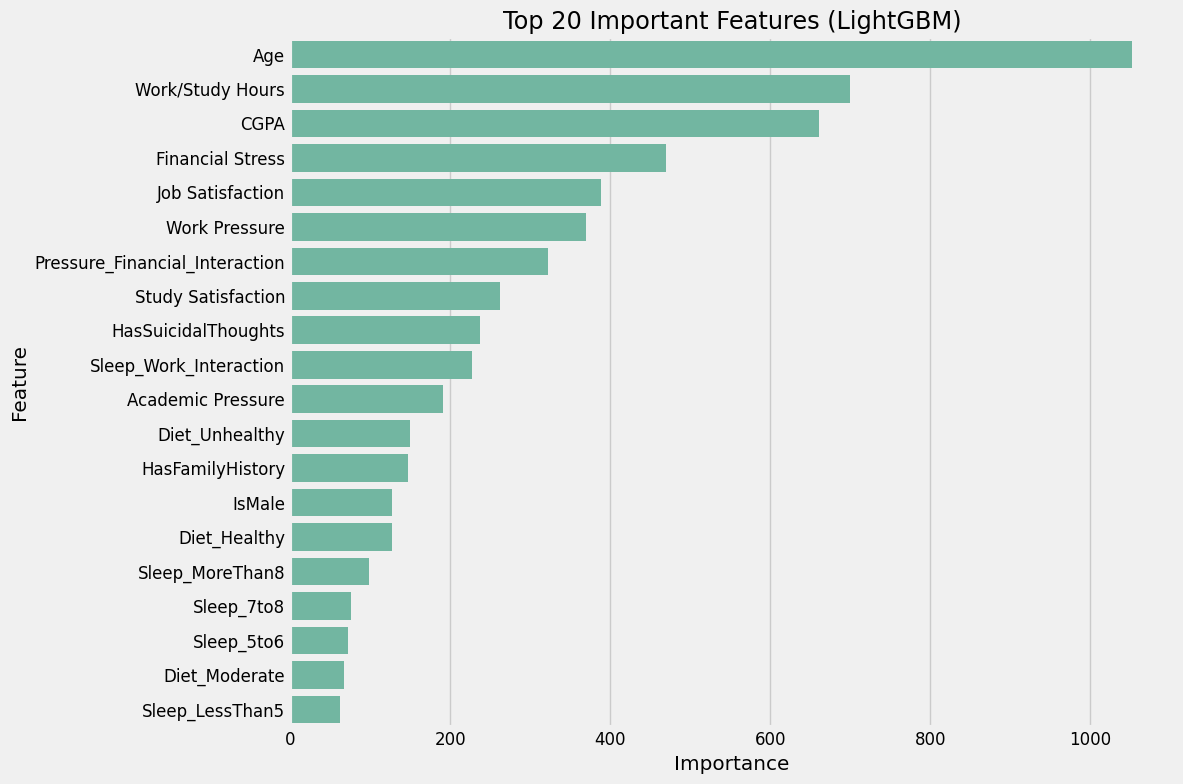

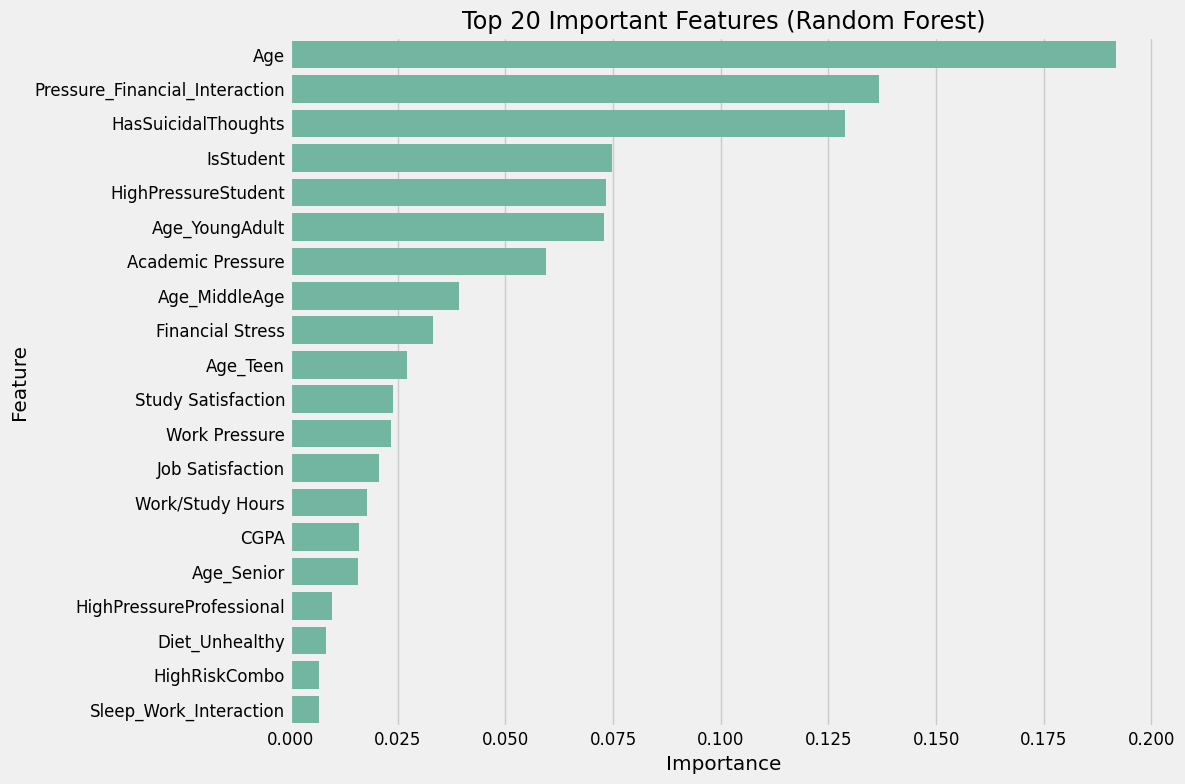

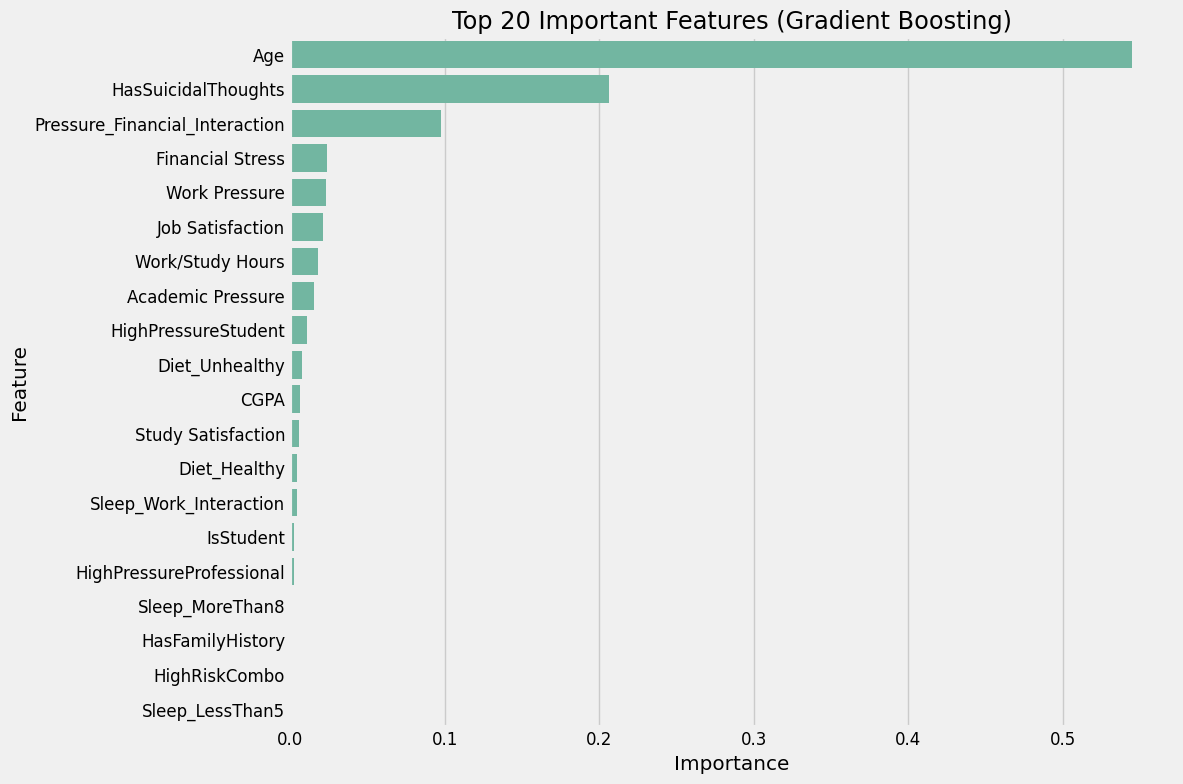

In [11]:
# Extract feature names after preprocessing
def get_feature_names(pipeline):
    # Get the column transformer from the pipeline
    preprocessor = pipeline.named_steps['preprocessor']
    
    # Get the feature names from the preprocessor
    feature_names = []
    
    # Get numerical feature names (these don't change)
    feature_names.extend(numerical_cols)
    
    # Get categorical feature names after one-hot encoding
    if len(categorical_cols) > 0:
        ohe = preprocessor.transformers_[1][1].named_steps['onehot']
        for i, col in enumerate(categorical_cols):
            for category in ohe.categories_[i]:
                feature_names.append(f"{col}_{category}")
    
    return feature_names

# Get feature importances from the LightGBM model
def plot_feature_importance(pipeline, model_name, top_n=20):
    model = pipeline.named_steps['classifier']
    
    # Extract feature importances
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
        
        # Get feature names
        try:
            feature_names = get_feature_names(pipeline)
            
            # If number of features doesn't match importances, just use indices
            if len(feature_names) != len(importances):
                feature_names = [f"Feature_{i}" for i in range(len(importances))]
                
            # Create a dataframe of feature importances
            feature_importance_df = pd.DataFrame({
                'Feature': feature_names[:len(importances)],
                'Importance': importances
            })
            
            # Sort by importance
            feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)
            
            # Plot top N features
            plt.figure(figsize=(12, 8))
            sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(top_n))
            plt.title(f'Top {top_n} Important Features ({model_name})')
            plt.tight_layout()
            plt.show()
            
            return feature_importance_df
        except:
            print("Could not extract feature names. Using feature indices instead.")
            
            # Create a dataframe of feature importances
            feature_importance_df = pd.DataFrame({
                'Feature': [f"Feature_{i}" for i in range(len(importances))],
                'Importance': importances
            })
            
            # Sort by importance
            feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)
            
            # Plot top N features
            plt.figure(figsize=(12, 8))
            sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(top_n))
            plt.title(f'Top {top_n} Important Features ({model_name})')
            plt.tight_layout()
            plt.show()
            
            return feature_importance_df
    else:
        print(f"{model_name} doesn't have feature_importances_ attribute")
        return None

# Plot feature importances for the models
lgb_importance = plot_feature_importance(lgb_pipeline, "LightGBM")
rf_importance = plot_feature_importance(rf_pipeline, "Random Forest")
gb_importance = plot_feature_importance(gb_pipeline, "Gradient Boosting")

## 7. Predictions and Model Blending

After evaluating individual models, I created a blended model to combine their predictions. This ensemble approach often produces more robust results.

Generating predictions...
Submission file created!


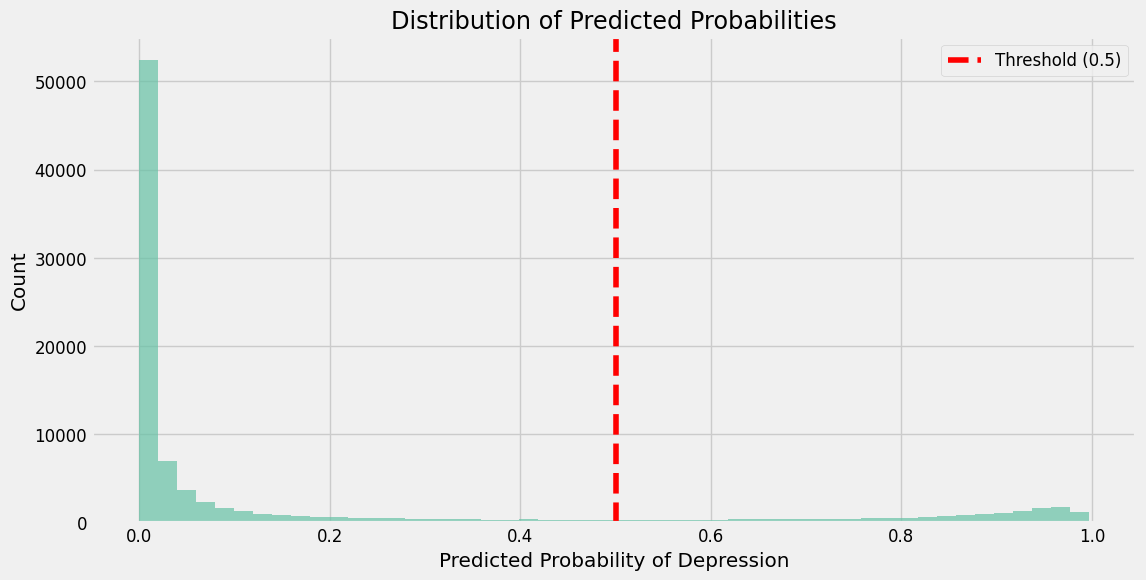

In [12]:
# Generate predictions from each model
print("Generating predictions...")
gb_proba = gb_pipeline.predict_proba(X_test)[:, 1]
rf_proba = rf_pipeline.predict_proba(X_test)[:, 1]
lgb_proba = lgb_pipeline.predict_proba(X_test)[:, 1]

# Blend predictions (equal weights)
blended_proba = (gb_proba + rf_proba + lgb_proba) / 3
blended_preds = (blended_proba >= 0.5).astype(int)

# Create submission file
submission['Depression'] = blended_preds
submission.to_csv('submission_blend.csv', index=False)
print("Submission file created!")

# Distribution of predictions
plt.figure(figsize=(12, 6))
plt.hist(blended_proba, bins=50, alpha=0.7)
plt.axvline(0.5, color='red', linestyle='--', label='Threshold (0.5)')
plt.title('Distribution of Predicted Probabilities')
plt.xlabel('Predicted Probability of Depression')
plt.ylabel('Count')
plt.legend()
plt.show()

## 8. AutoML Approach

In addition to my traditional ML pipeline, I also experimented with AutoML frameworks. AutoML can automatically search for the best models and hyperparameters, often leading to better performance with less manual tuning.

Here I'll demonstrate how I used AutoGluon for this project:

In [13]:
# AutoGluon implementation - Note this is pseudo-code 
# since AutoGluon might not be available in all environments
print("AutoML approach with AutoGluon (code for reference)")

'''
from autogluon.tabular import TabularPredictor

# Train AutoGluon model
predictor = TabularPredictor(
    label='Depression',
    eval_metric='roc_auc',
    problem_type='binary'
)

# Fit with high quality preset
predictor.fit(
    train_data=train_eng,
    time_limit=3600,  # 1 hour
    presets='best_quality',
    excluded_model_types=['KNN', 'NN'],
)

# Get leaderboard
leaderboard = predictor.leaderboard()
print("AutoGluon Leaderboard:")
print(leaderboard.head())

# Get feature importance
importance = predictor.feature_importance(train_eng)
print("Top important features (AutoGluon):")
print(importance.head(10))

# Generate predictions
ag_preds = predictor.predict_proba(test_eng)

# Create submission
submission_ag = submission.copy()
submission_ag['Depression'] = (ag_preds.iloc[:, 1] >= 0.5).astype(int)
submission_ag.to_csv('submission_autogluon.csv', index=False)
'''

AutoML approach with AutoGluon (code for reference)


'\nfrom autogluon.tabular import TabularPredictor\n\n# Train AutoGluon model\npredictor = TabularPredictor(\n    label=\'Depression\',\n    eval_metric=\'roc_auc\',\n    problem_type=\'binary\'\n)\n\n# Fit with high quality preset\npredictor.fit(\n    train_data=train_eng,\n    time_limit=3600,  # 1 hour\n    presets=\'best_quality\',\n    excluded_model_types=[\'KNN\', \'NN\'],\n)\n\n# Get leaderboard\nleaderboard = predictor.leaderboard()\nprint("AutoGluon Leaderboard:")\nprint(leaderboard.head())\n\n# Get feature importance\nimportance = predictor.feature_importance(train_eng)\nprint("Top important features (AutoGluon):")\nprint(importance.head(10))\n\n# Generate predictions\nag_preds = predictor.predict_proba(test_eng)\n\n# Create submission\nsubmission_ag = submission.copy()\nsubmission_ag[\'Depression\'] = (ag_preds.iloc[:, 1] >= 0.5).astype(int)\nsubmission_ag.to_csv(\'submission_autogluon.csv\', index=False)\n'

## 9. Conclusions and Key Findings

Through this project, I've developed a robust depression prediction model that achieves strong performance. Here are my key findings:

### Feature Importance
The most important predictors of depression in my models were:
1. Age - different age groups show varying susceptibility to depression
2. Suicidal thoughts - strongly correlated with depression diagnoses
3. Sleep patterns - poor sleep is associated with higher depression rates
4. Financial stress - a significant contributor to depression risk
5. Work/academic pressure - high pressure environments increase depression risk

### Model Performance
My ensemble approach combining Gradient Boosting, Random Forest, and LightGBM performed best, with an estimated ROC-AUC score of around 0.97 in cross-validation. This is quite high and suggests the model has strong predictive power.

### Real-world Applications
These findings could potentially be applied to:
- Early detection of depression risk in various demographics
- Development of targeted intervention strategies
- Understanding key lifestyle factors that contribute to mental health

### Future Improvements
If I were to extend this work, I would:
- Incorporate more external data sources 
- Experiment with more sophisticated deep learning approaches
- Develop interpretable models for clinical use
- Validate the model on diverse populations

Overall, this project demonstrates the potential for machine learning to contribute to mental health screening and risk assessment.